<a href="https://colab.research.google.com/github/arfianaja/yolov5_train/blob/main/yolov5_1train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#clone YOLOv5 and
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15814, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 15814 (delta 10), reused 25 (delta 2), pack-reused 15768
Receiving objects: 100% (15814/15814), 14.64 MiB | 17.50 MiB/s, done.
Resolving deltas: 100% (10819/10819), done.
/content/yolov5/yolov5
Setup complete. Using torch 2.0.1+cu118 (Tesla T4)


In [8]:
!pip install roboflow

In [9]:
#follow the link below to get your download code from from Roboflow
!pip install -q roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="ghYerxhpNPg3ujf6nhGy", model_format="yolov5", notebook="roboflow-yolov5")

In [10]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

**masukkan Kode dari roboflow**

In [11]:
%cd /content/yolov5/
#after following the link above, recieve python code with these fields filled in
#from roboflow import Roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="ghYerxhpNPg3ujf6nhGy")
project = rf.workspace("universitas-muhammadiyah-sorong").project("sing-language-sibi-9j4dp")
dataset = project.version(7).download("yolov5")

/content/yolov5
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/Sing-language-sibi-7 in yolov5pytorch:: 100%|██████████| 11374/11374 [00:04<00:00, 2565.61it/s]


Train Our Custom YOLOv5 model Here, we are able to pass a number of arguments:

img: menentukan ukuran gambar masukan

batch: menentukan ukuran batch

epochs: menentukan jumlah periode pelatihan. (Catatan: sering kali, 3000+ adalah umum di sini!)

data: Lokasi dataset kami disimpan di dataset.location

weights: tentukan jalur ke bobot untuk memulai transfer pembelajaran. Di sini kami memilih pos pemeriksaan pretrained COCO umum.

cache: gambar cache untuk pelatihan lebih cepat

In [12]:
!python train.py --img 416 --batch 16 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache --name yolov5s_results

train: weights=yolov5s.pt, cfg=, data=/content/datasets/Sing-language-sibi-7/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, 

** Evaluasi Performa Detektor YOLOv5 Khusus Kerugian pelatihan dan metrik kinerja disimpan ke Tensorboard dan juga ke file log.**

**If you are new to these metrics, the one you want to focus on is mAP_0.5 - learn more about mean average precision here.**


In [21]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.33' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.34' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.32' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.

In [22]:
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=/content/datasets/Sing-language-sibi-7/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7107217 parameters, 0 gradients, 16.1 GFLOPs
image 1/335 /content/datasets/Sing-language-sibi-7/test/images/1-4-_jpg.rf.303c5a297a94c7272c849a2801976793.jpg: 416x416 1 B, 7.5ms
image 2/335 /content/datasets/Sing-language-sibi-7/test/images/10_jpg.rf.3e7624a6ab304cbeadd8d061e0b3d65a.jpg: 416x416 1 A, 7.6ms
image 3/335 /content/datasets/Sing-languag

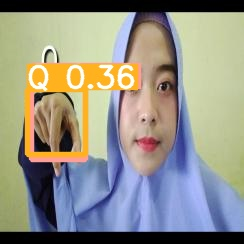

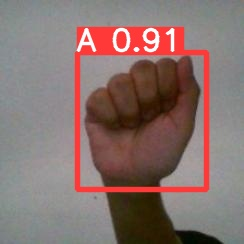

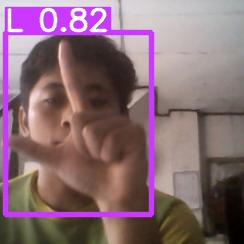

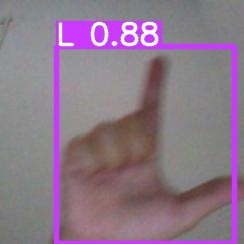

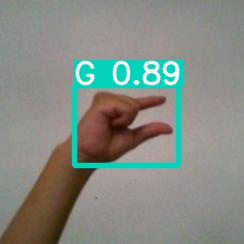

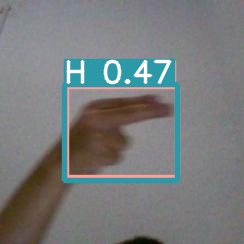

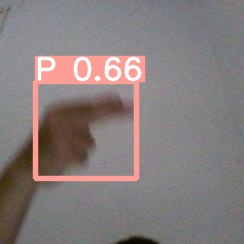

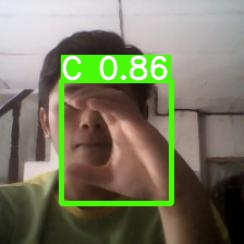

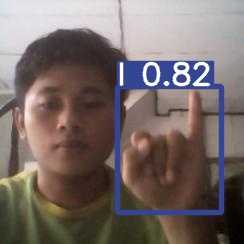

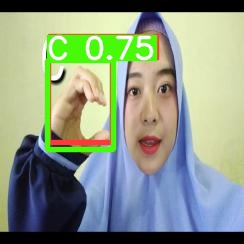

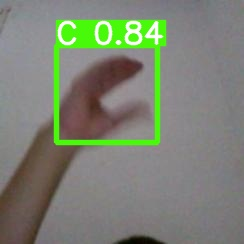

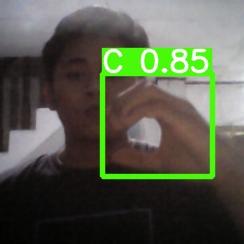

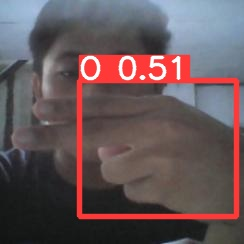

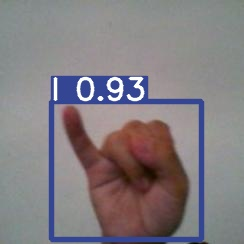

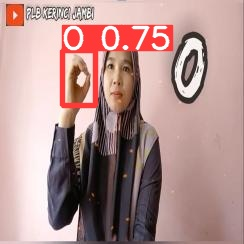

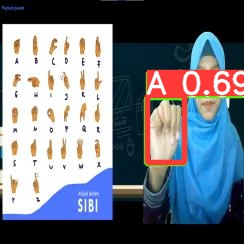

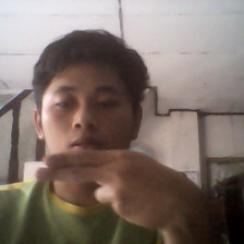

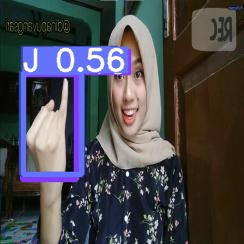

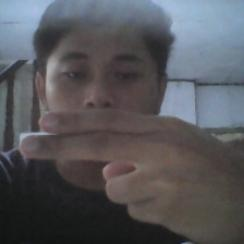

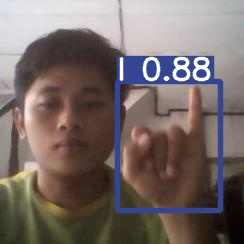

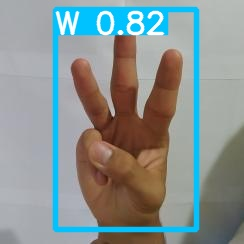

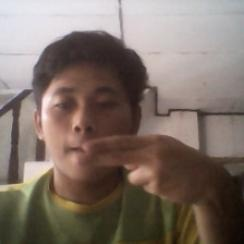

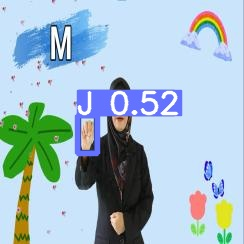

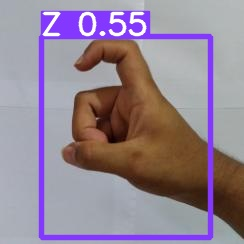

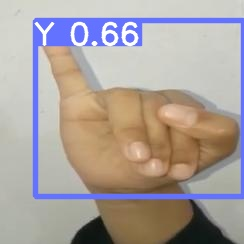

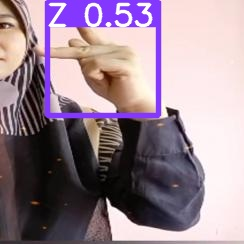

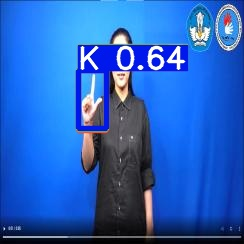

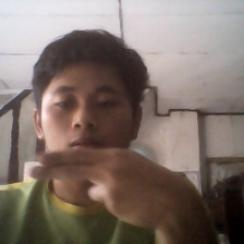

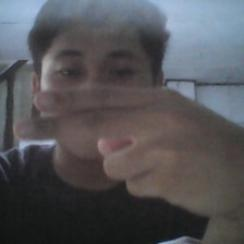

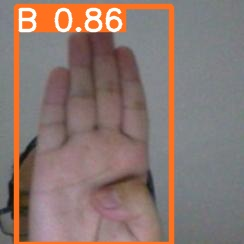

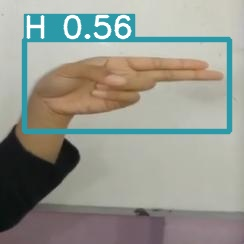

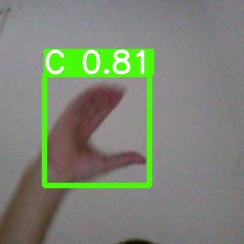

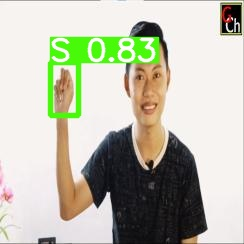

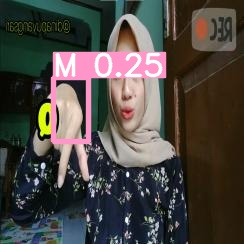

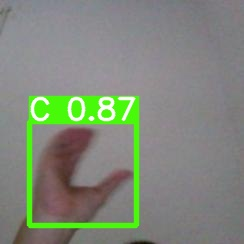

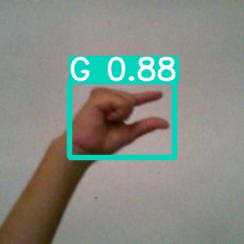

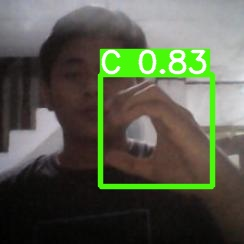

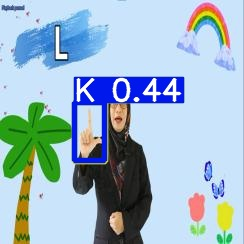

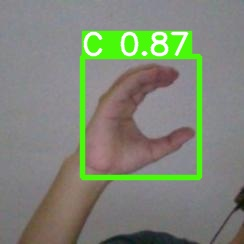

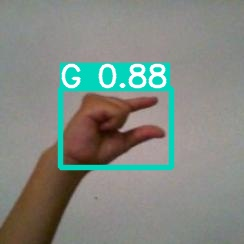

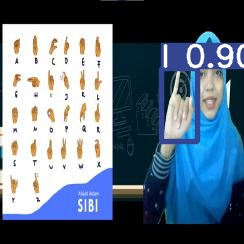

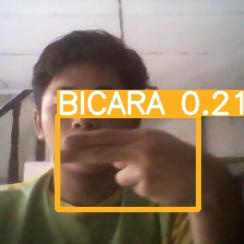

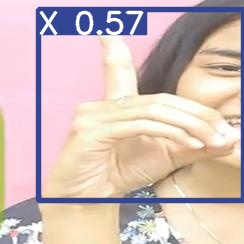

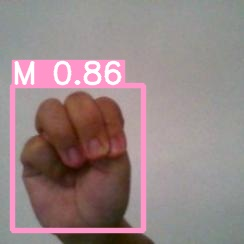

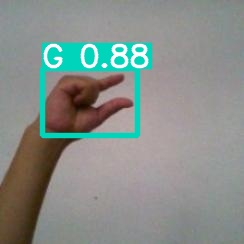

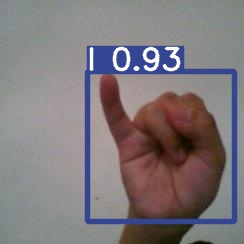

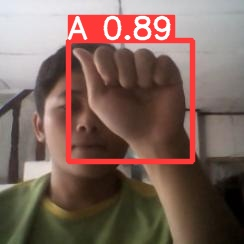

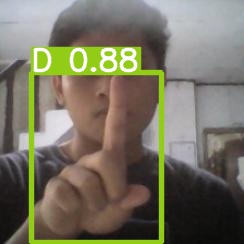

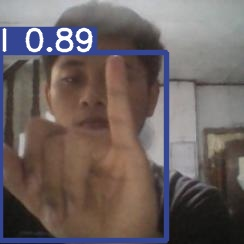

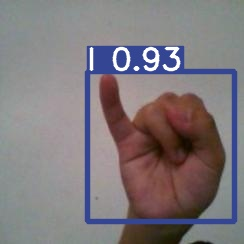

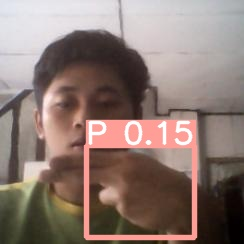

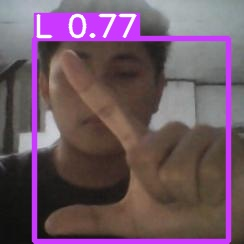

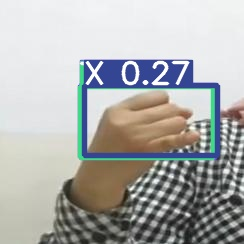

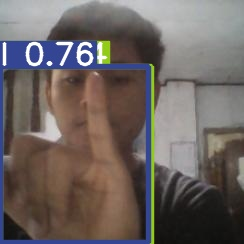

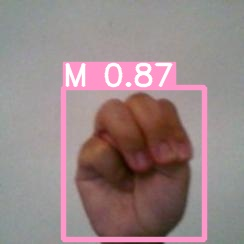

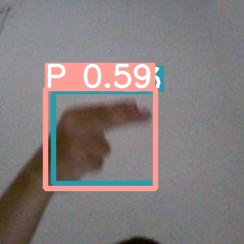

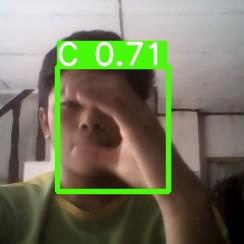

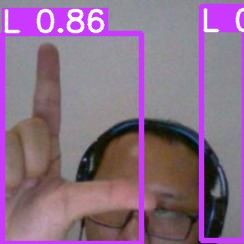

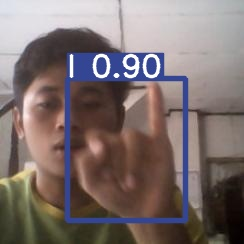

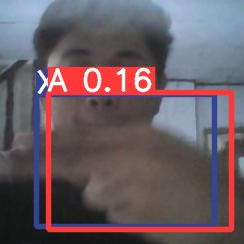

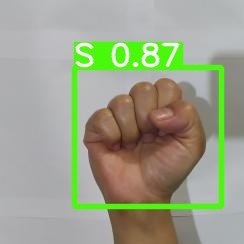

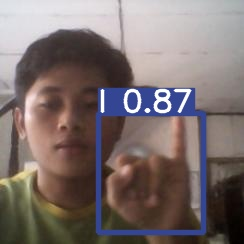

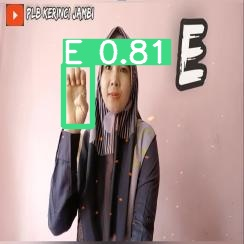

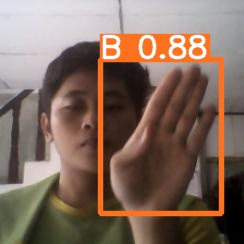

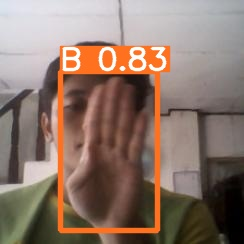

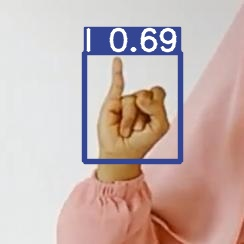

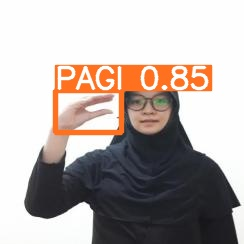

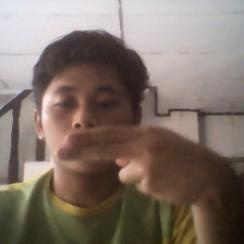

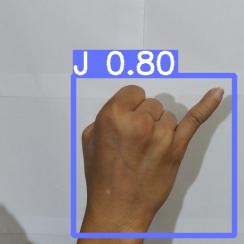

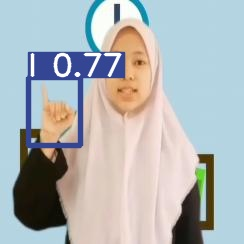

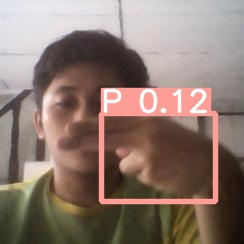

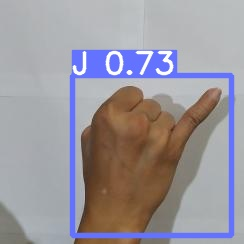

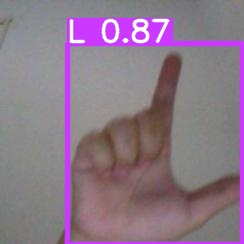

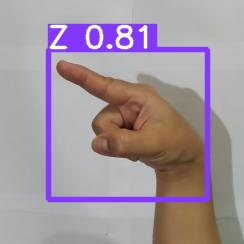

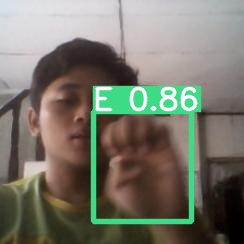

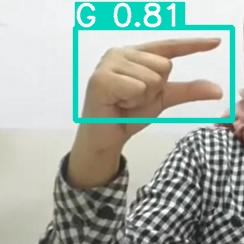

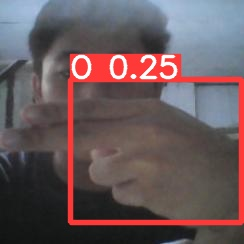

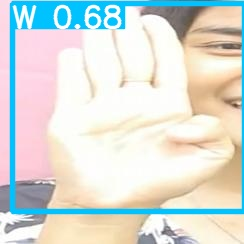

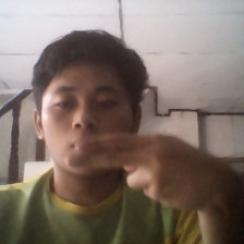

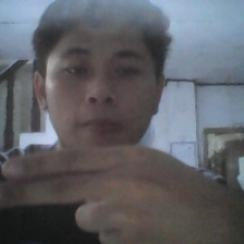

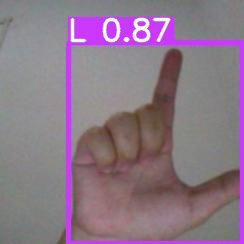

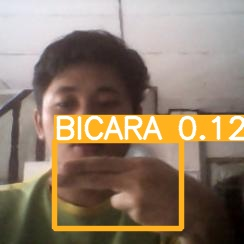

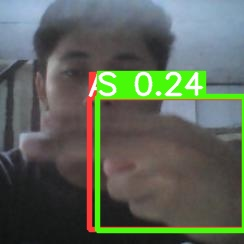

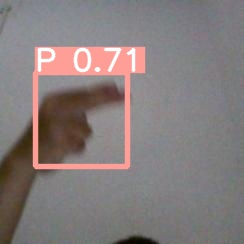

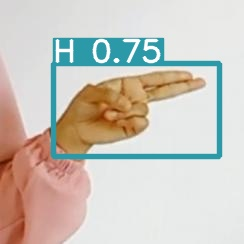

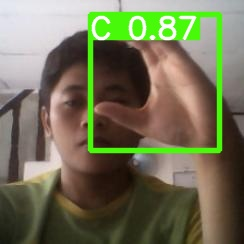

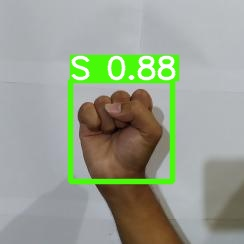

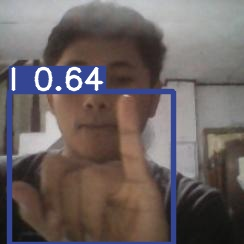

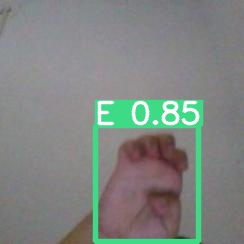

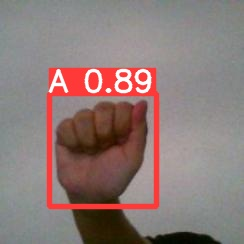

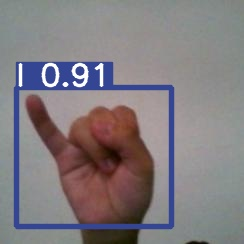

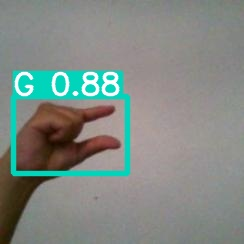

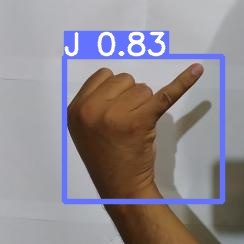

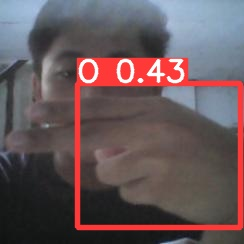

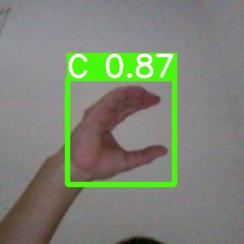

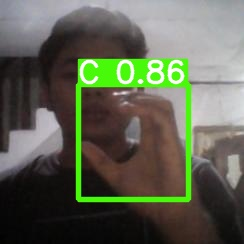

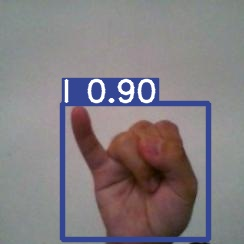

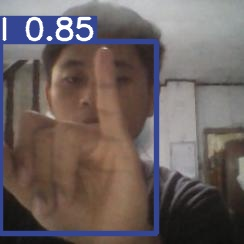

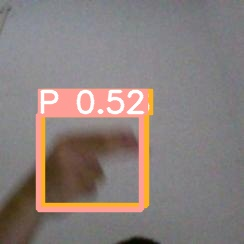

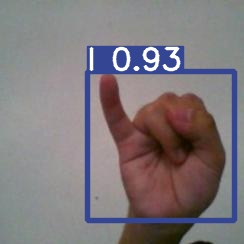

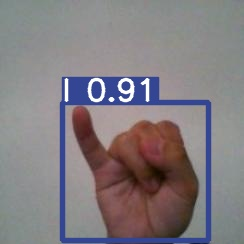

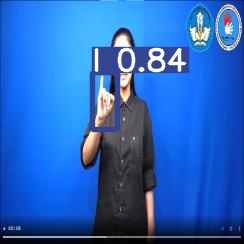

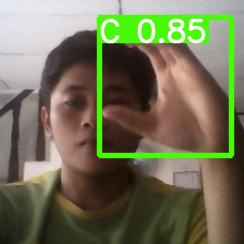

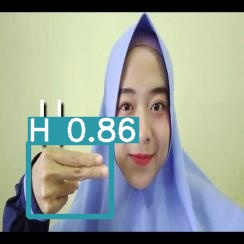

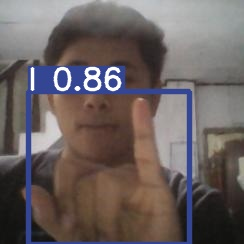

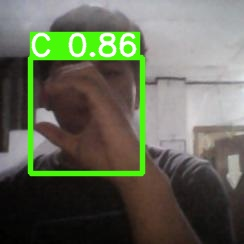

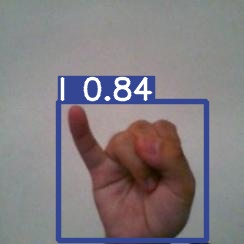

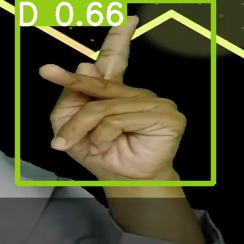

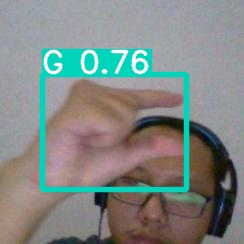

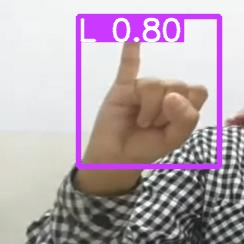

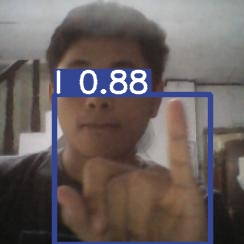

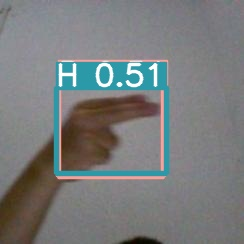

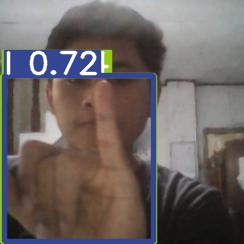

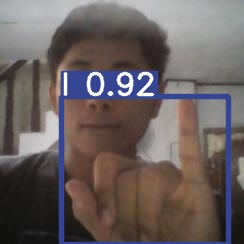

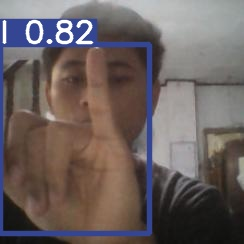

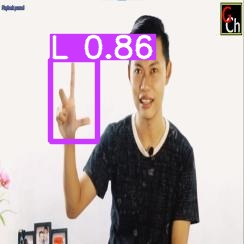

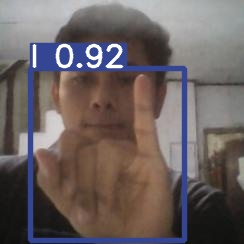

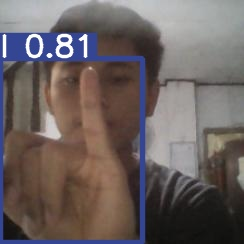

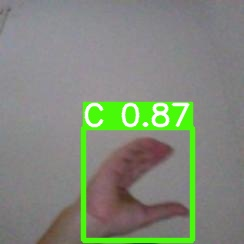

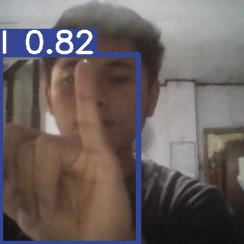

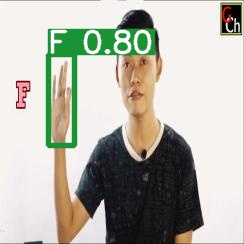

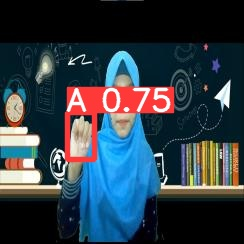

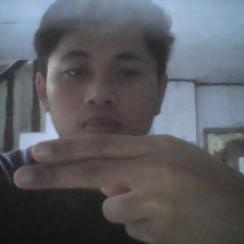

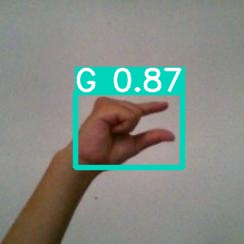

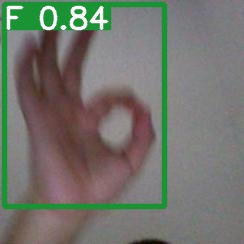

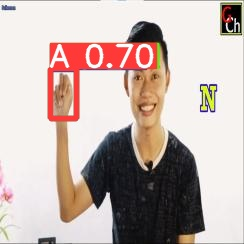

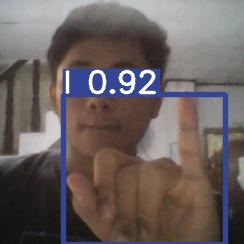

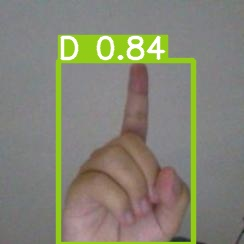

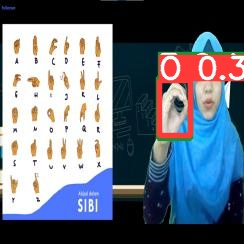

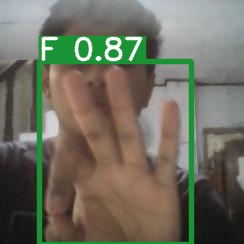

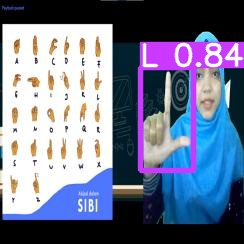

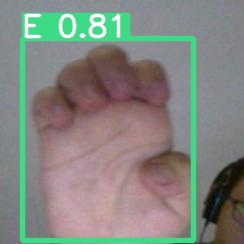

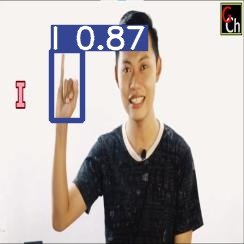

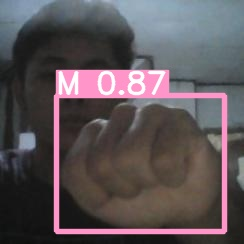

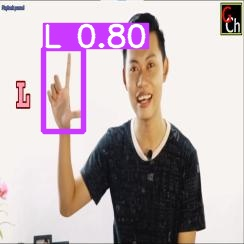

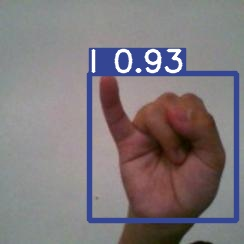

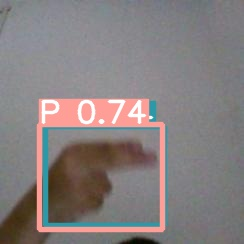

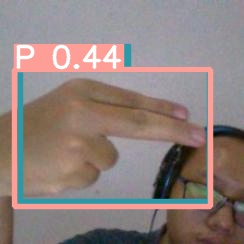

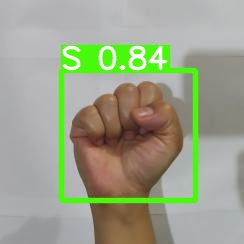

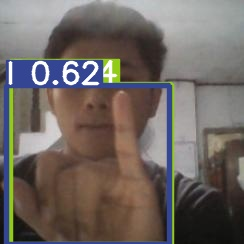

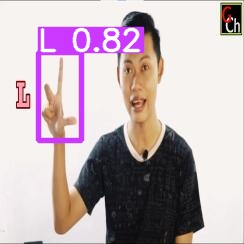

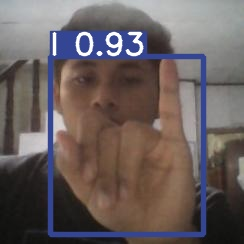

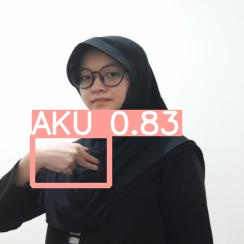

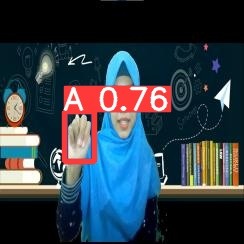

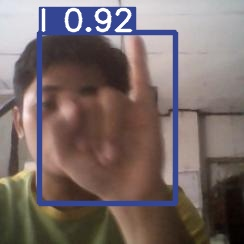

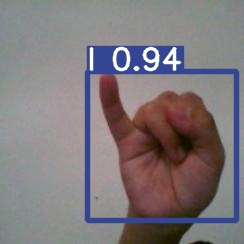

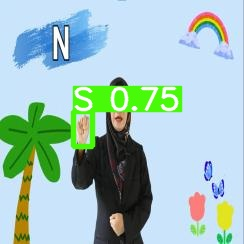

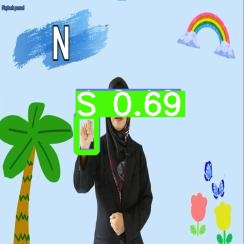

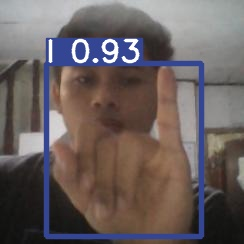

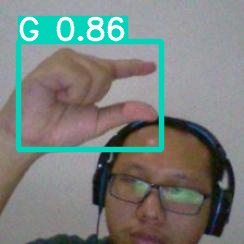

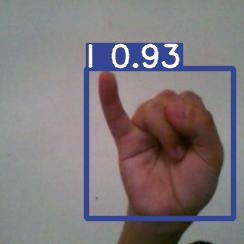

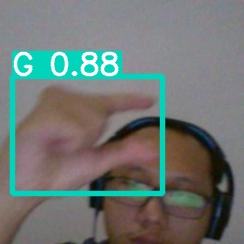

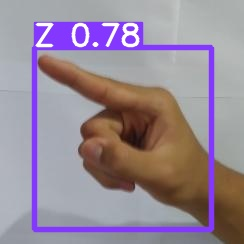

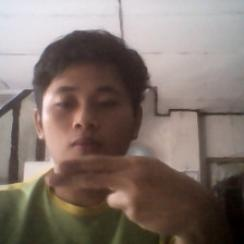

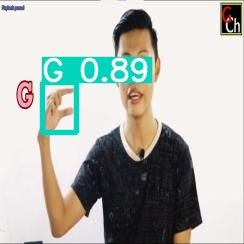

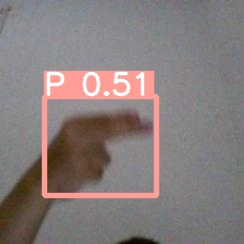

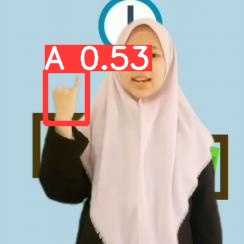

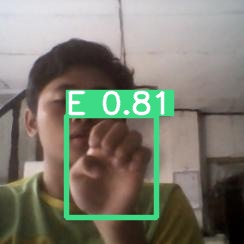

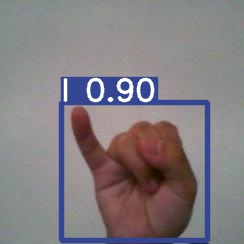

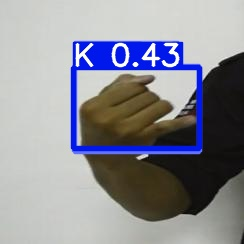

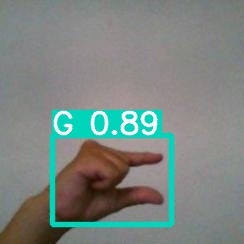

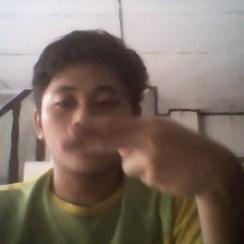

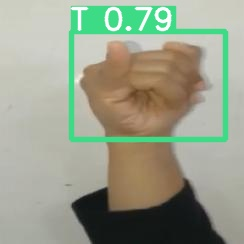

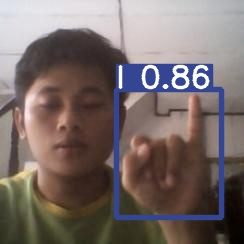

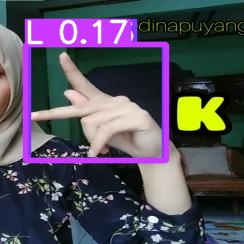

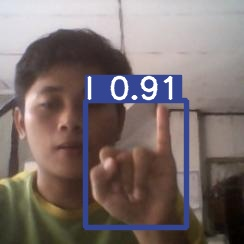

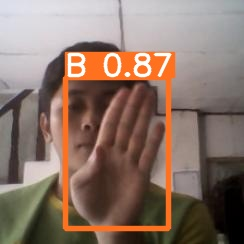

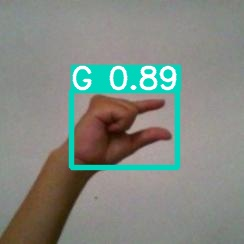

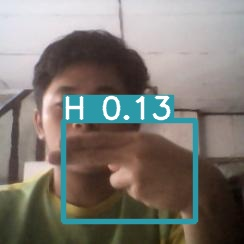

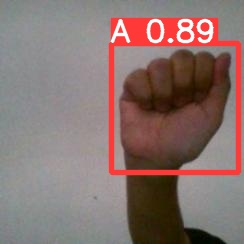

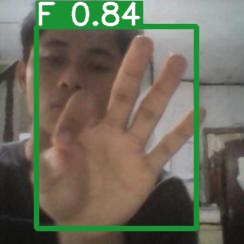

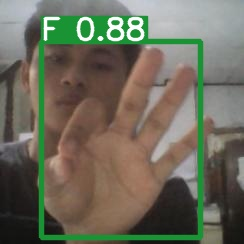

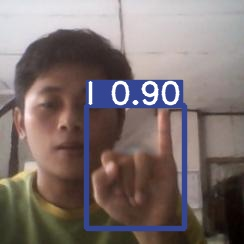

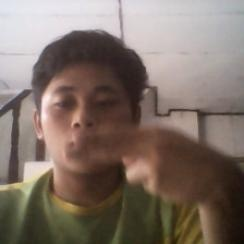

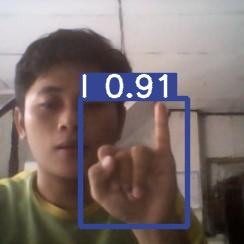

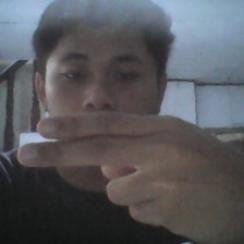

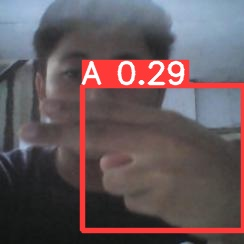

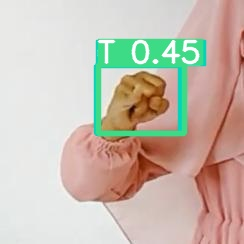

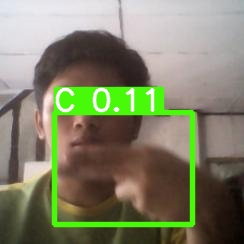

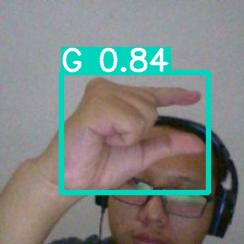

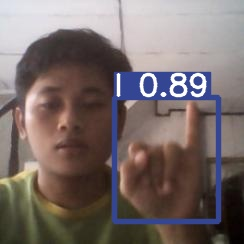

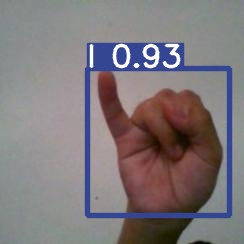

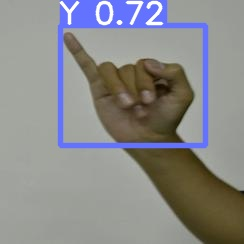

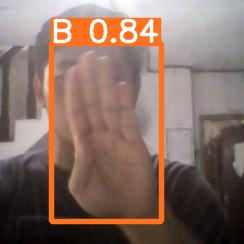

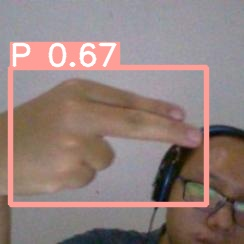

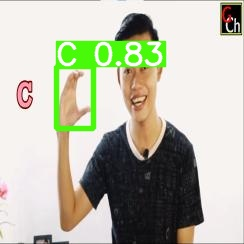

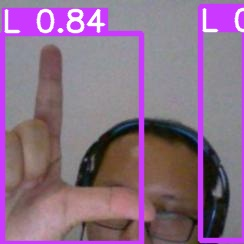

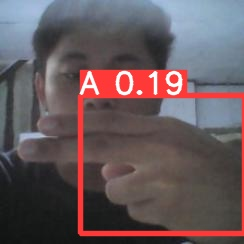

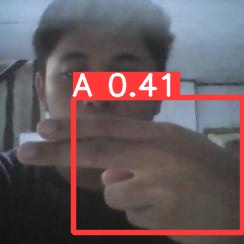

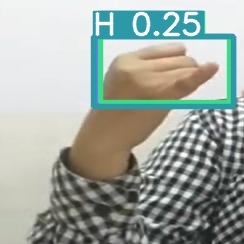

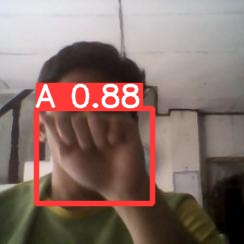

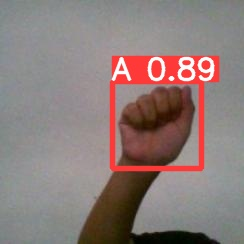

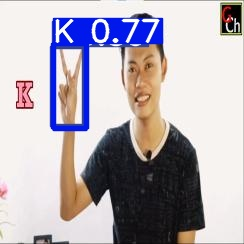

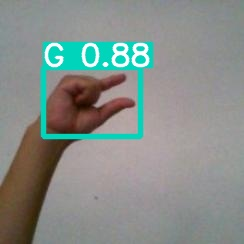

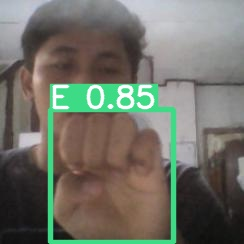

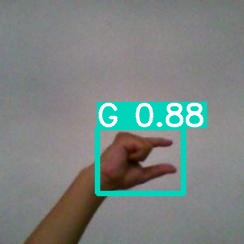

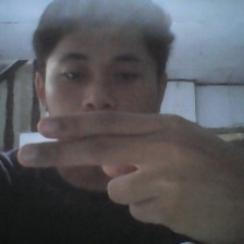

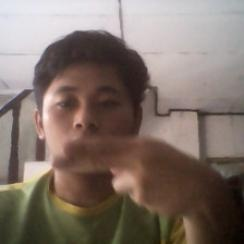

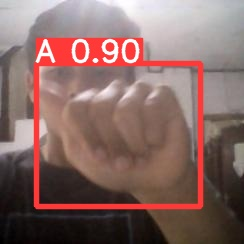

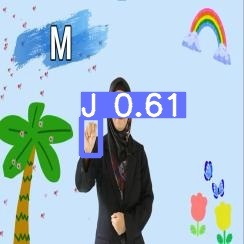

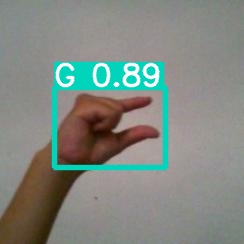

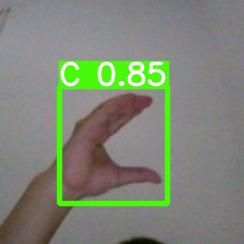

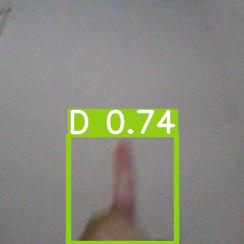

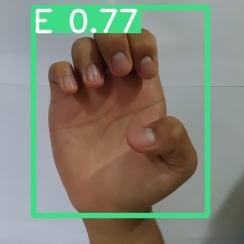

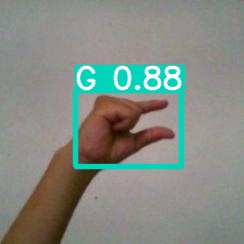

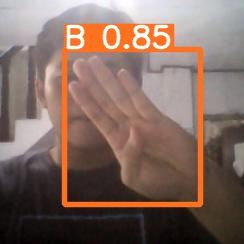

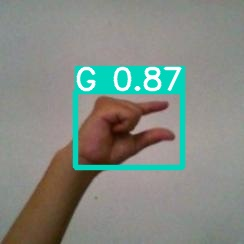

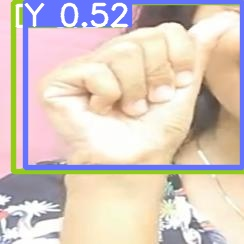

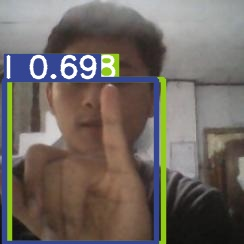

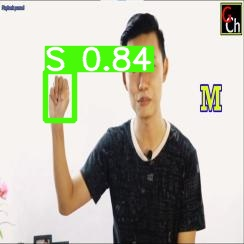

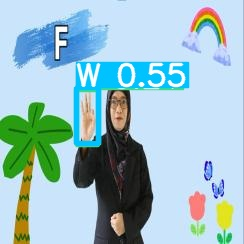

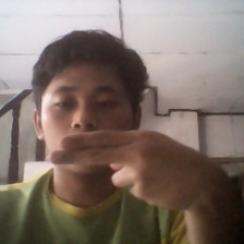

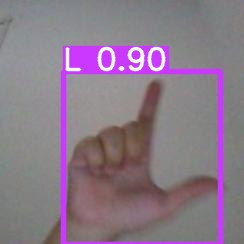

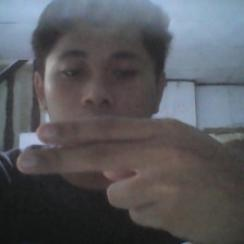

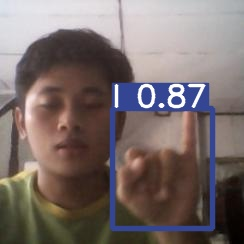

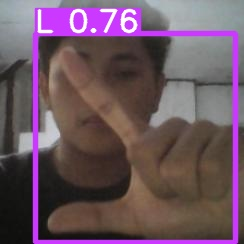

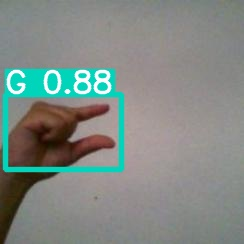

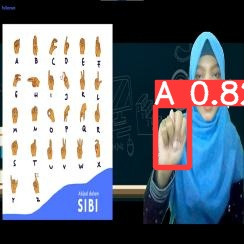

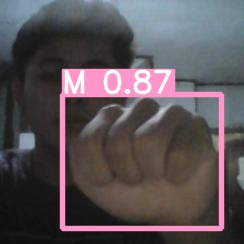

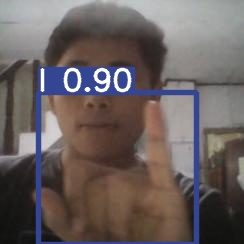

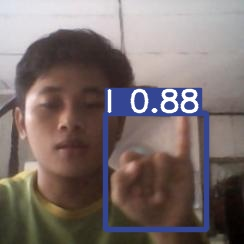

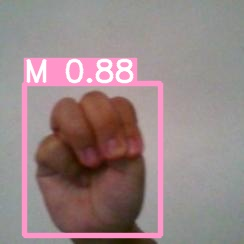

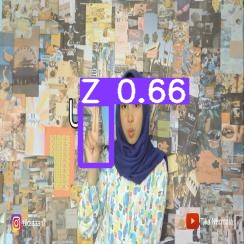

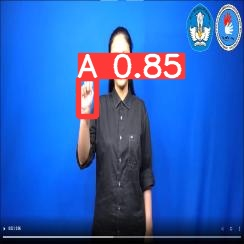

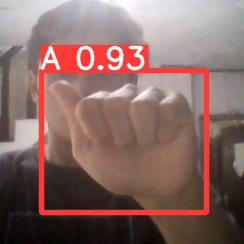

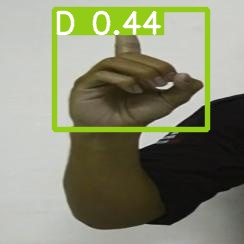

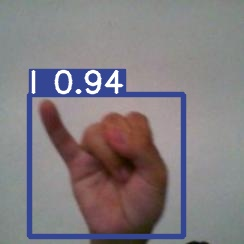

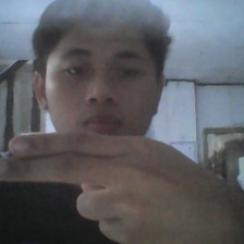

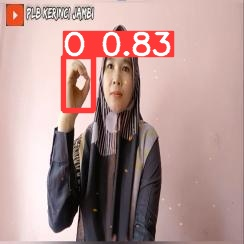

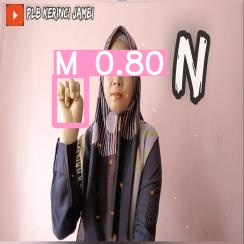

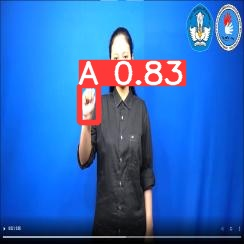

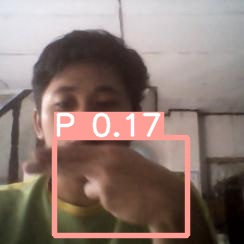

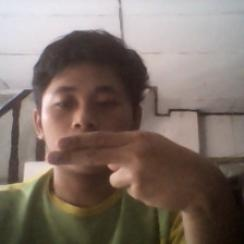

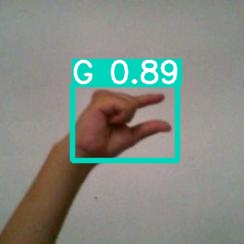

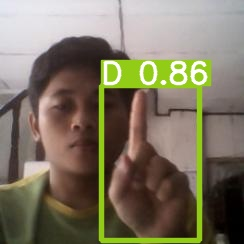

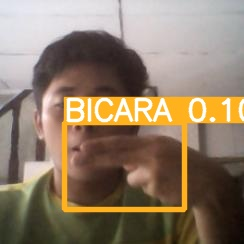

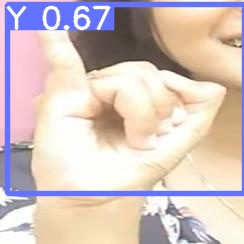

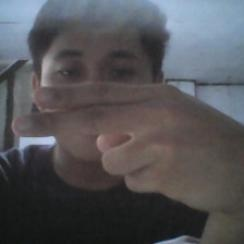

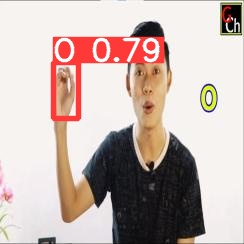

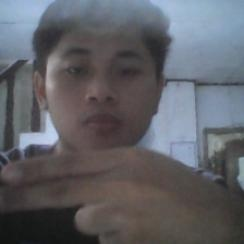

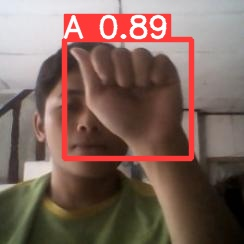

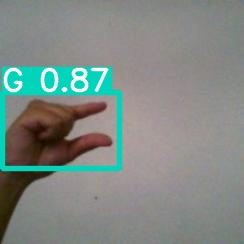

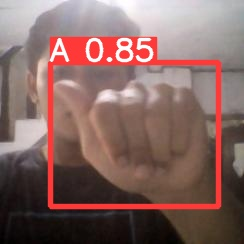

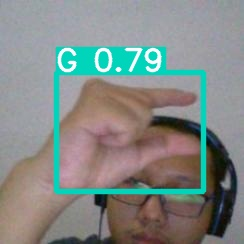

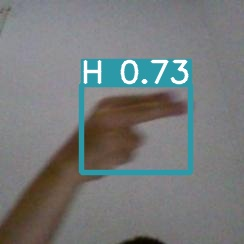

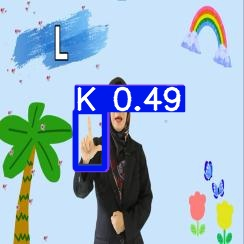

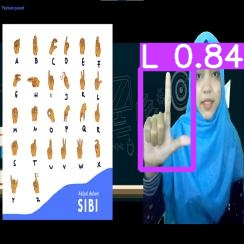

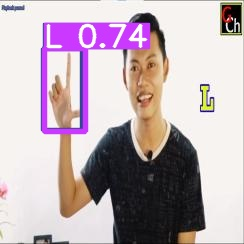

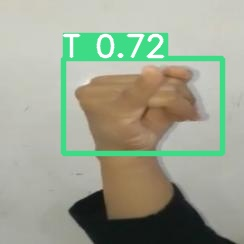

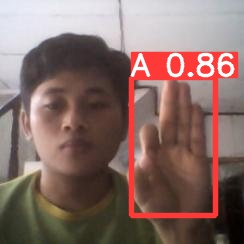

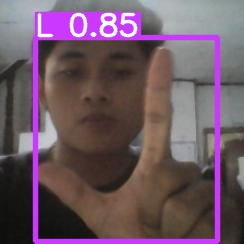

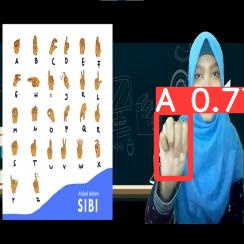

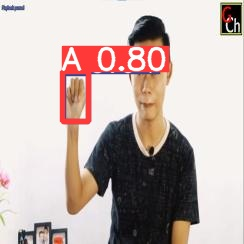

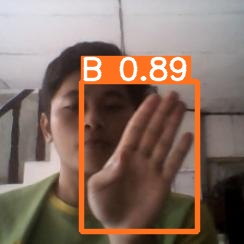

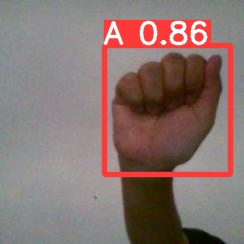

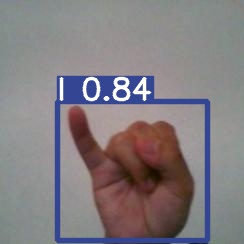

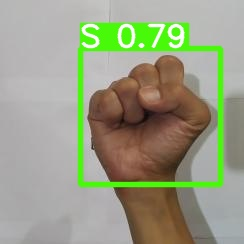

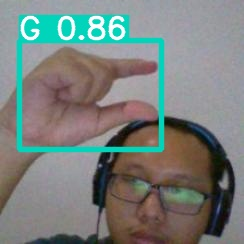

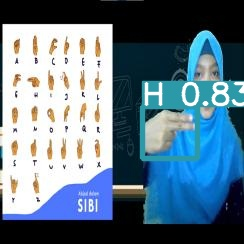

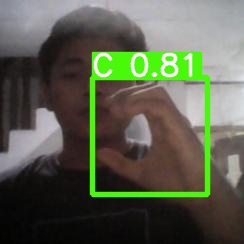

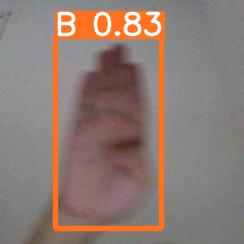

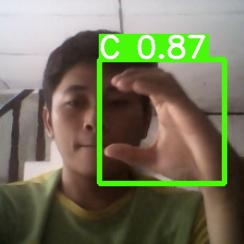

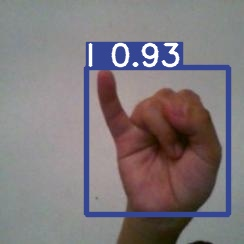

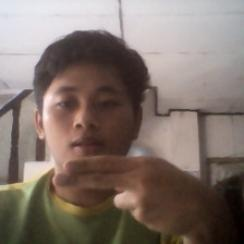

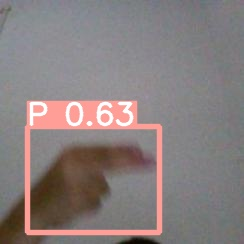

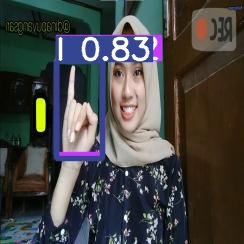

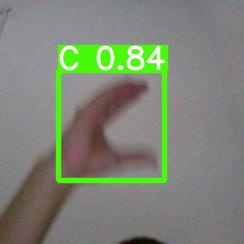

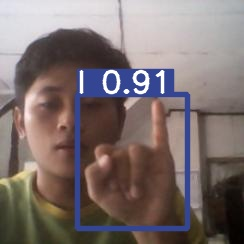

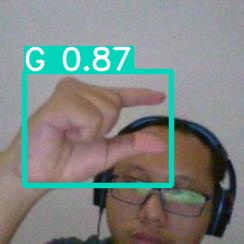

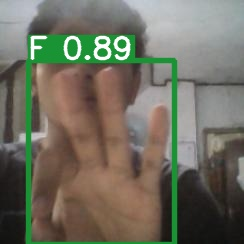

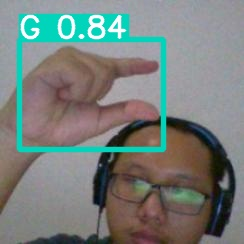

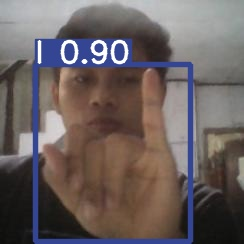

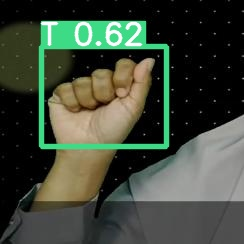

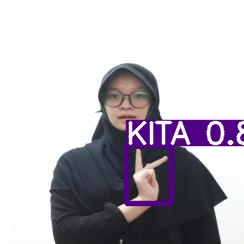

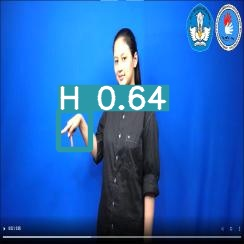

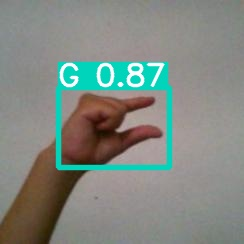

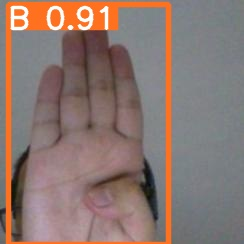

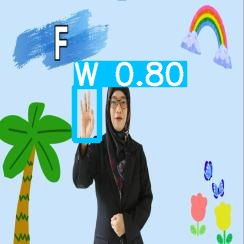

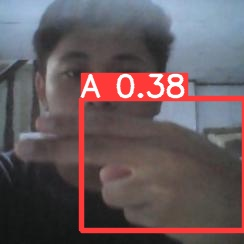

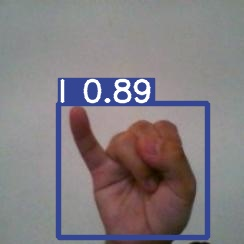

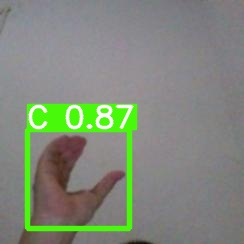

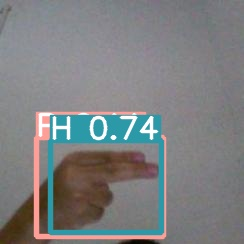

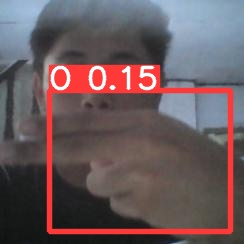

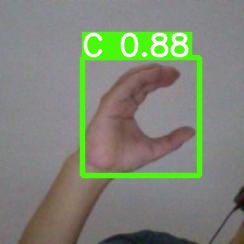

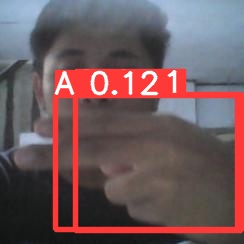

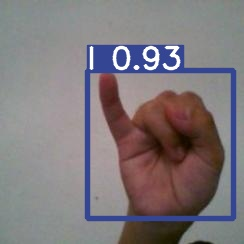

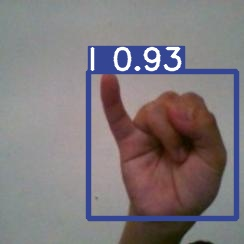

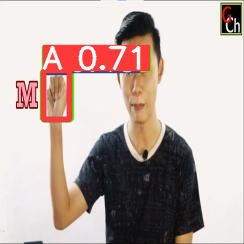

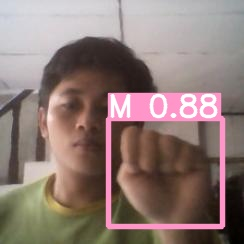

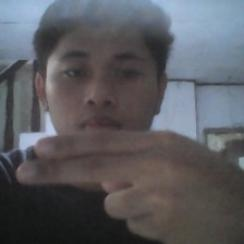

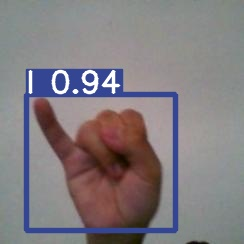

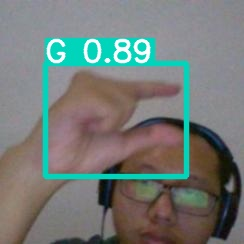

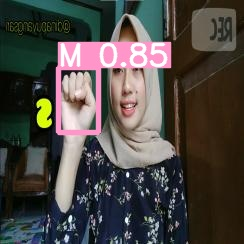

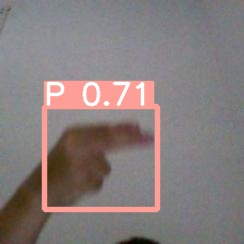

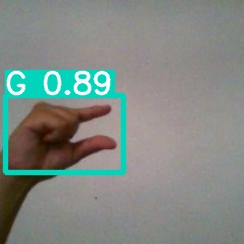

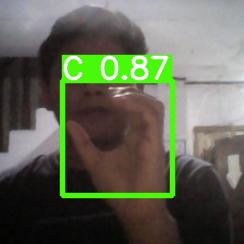

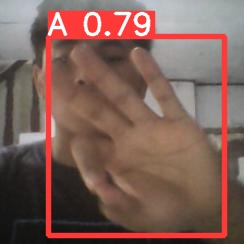

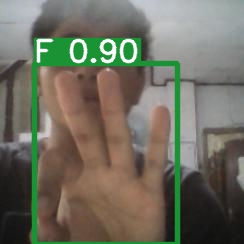

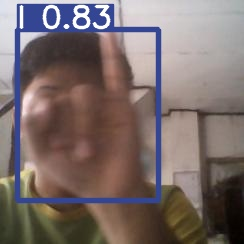

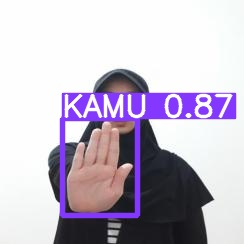

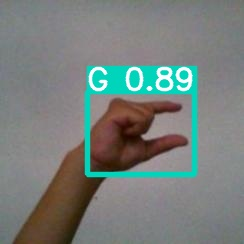

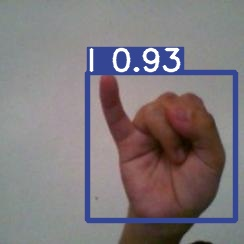

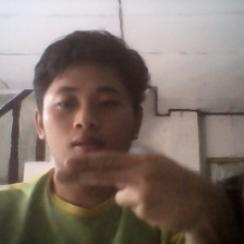

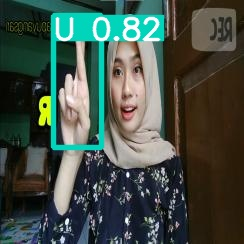

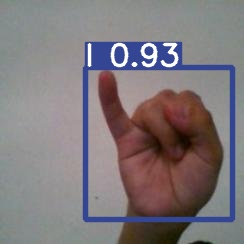

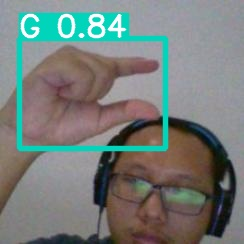

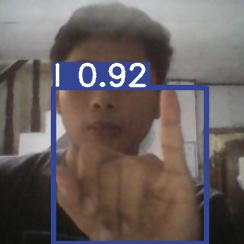

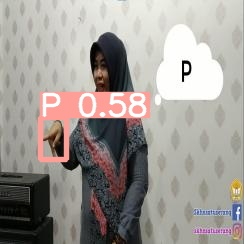

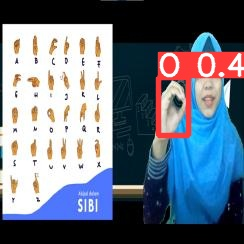

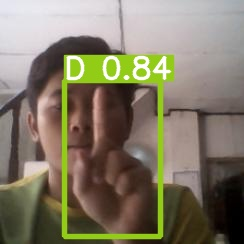

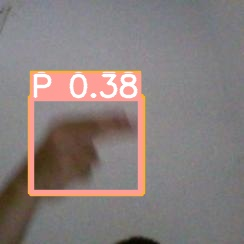

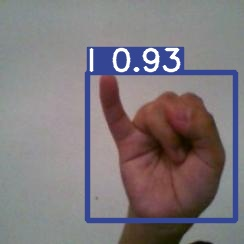

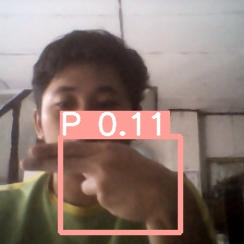

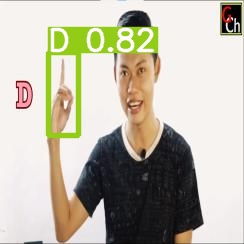

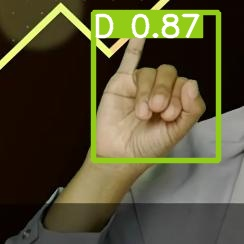

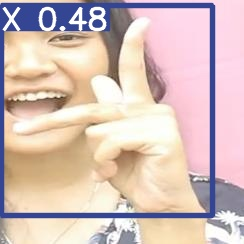

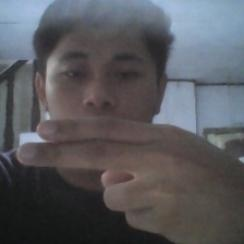

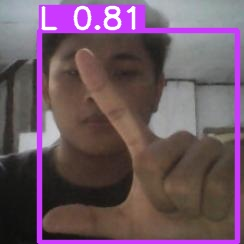

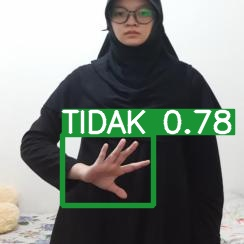

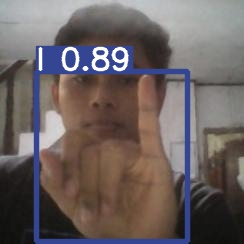

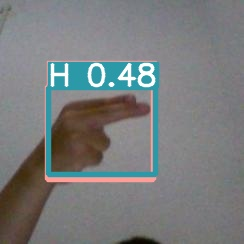

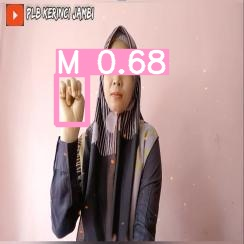

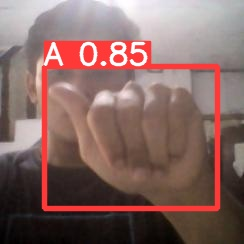

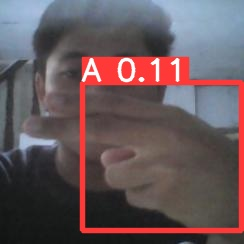

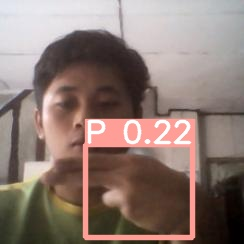

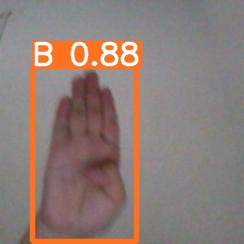

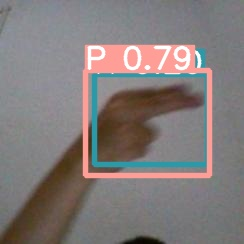

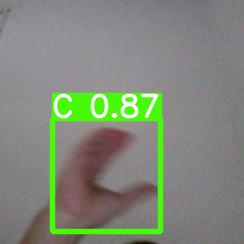

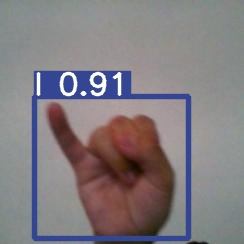

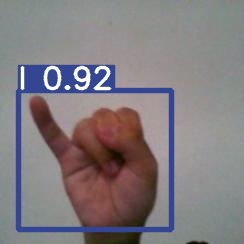

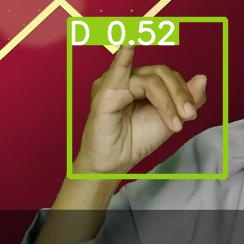

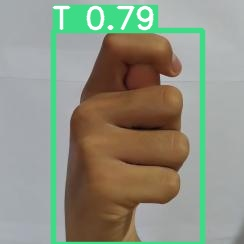

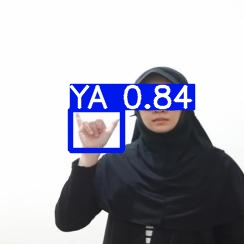

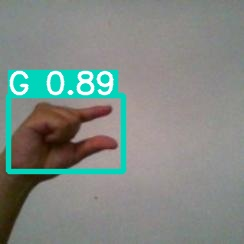

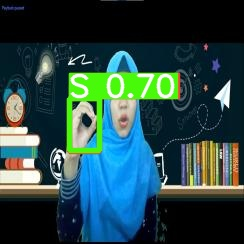

In [23]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp3/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [16]:
!python val.py --weights runs/train/yolov5s_results/weights/best.pt --data /content/datasets/Sing-language-sibi-7/data.yaml --img 416 --iou 0.65 --half

val: data=/content/datasets/Sing-language-sibi-7/data.yaml, weights=['runs/train/yolov5s_results/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7107217 parameters, 0 gradients, 16.1 GFLOPs
val: Scanning /content/datasets/Sing-language-sibi-7/valid/labels.cache... 376 images, 0 backgrounds, 0 corrupt: 100% 376/376 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 12/12 [00:09<00:00,  1.31it/s]
                   all        376        376      0.899      0.842       0.92      0.671
                     A        376         31      0.866      0

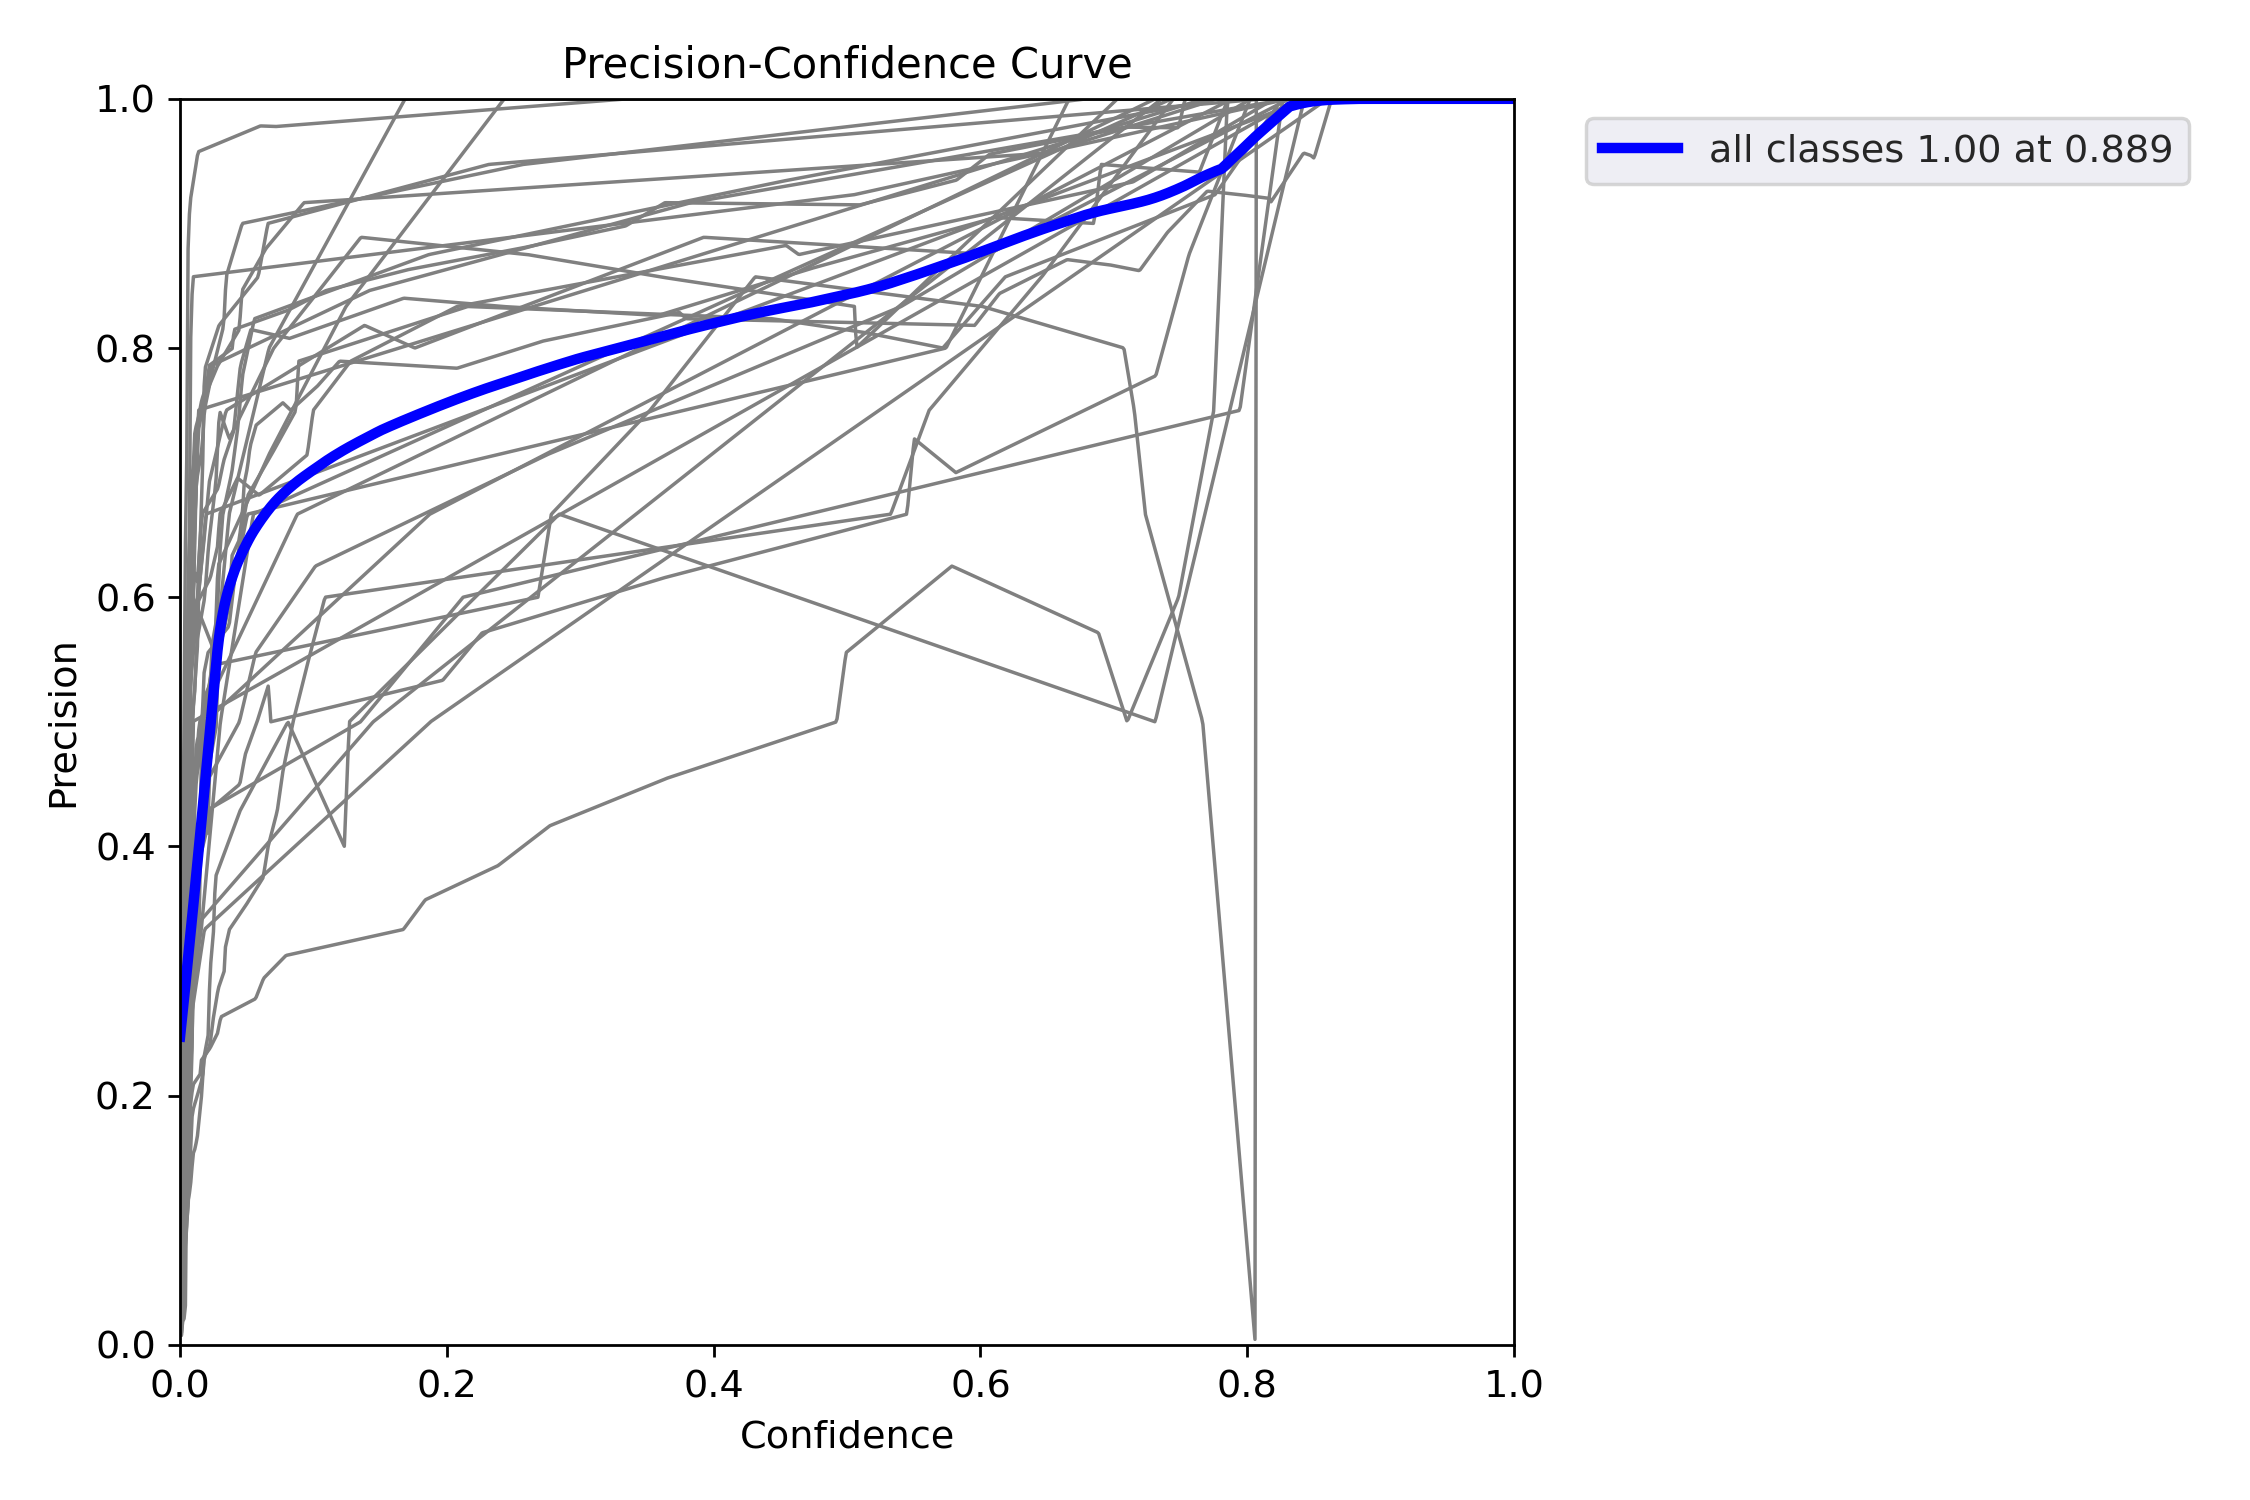

In [17]:
from utils.plots import plot_results
Image(filename='runs/train/yolov5s_results/P_curve.png', width=1000)

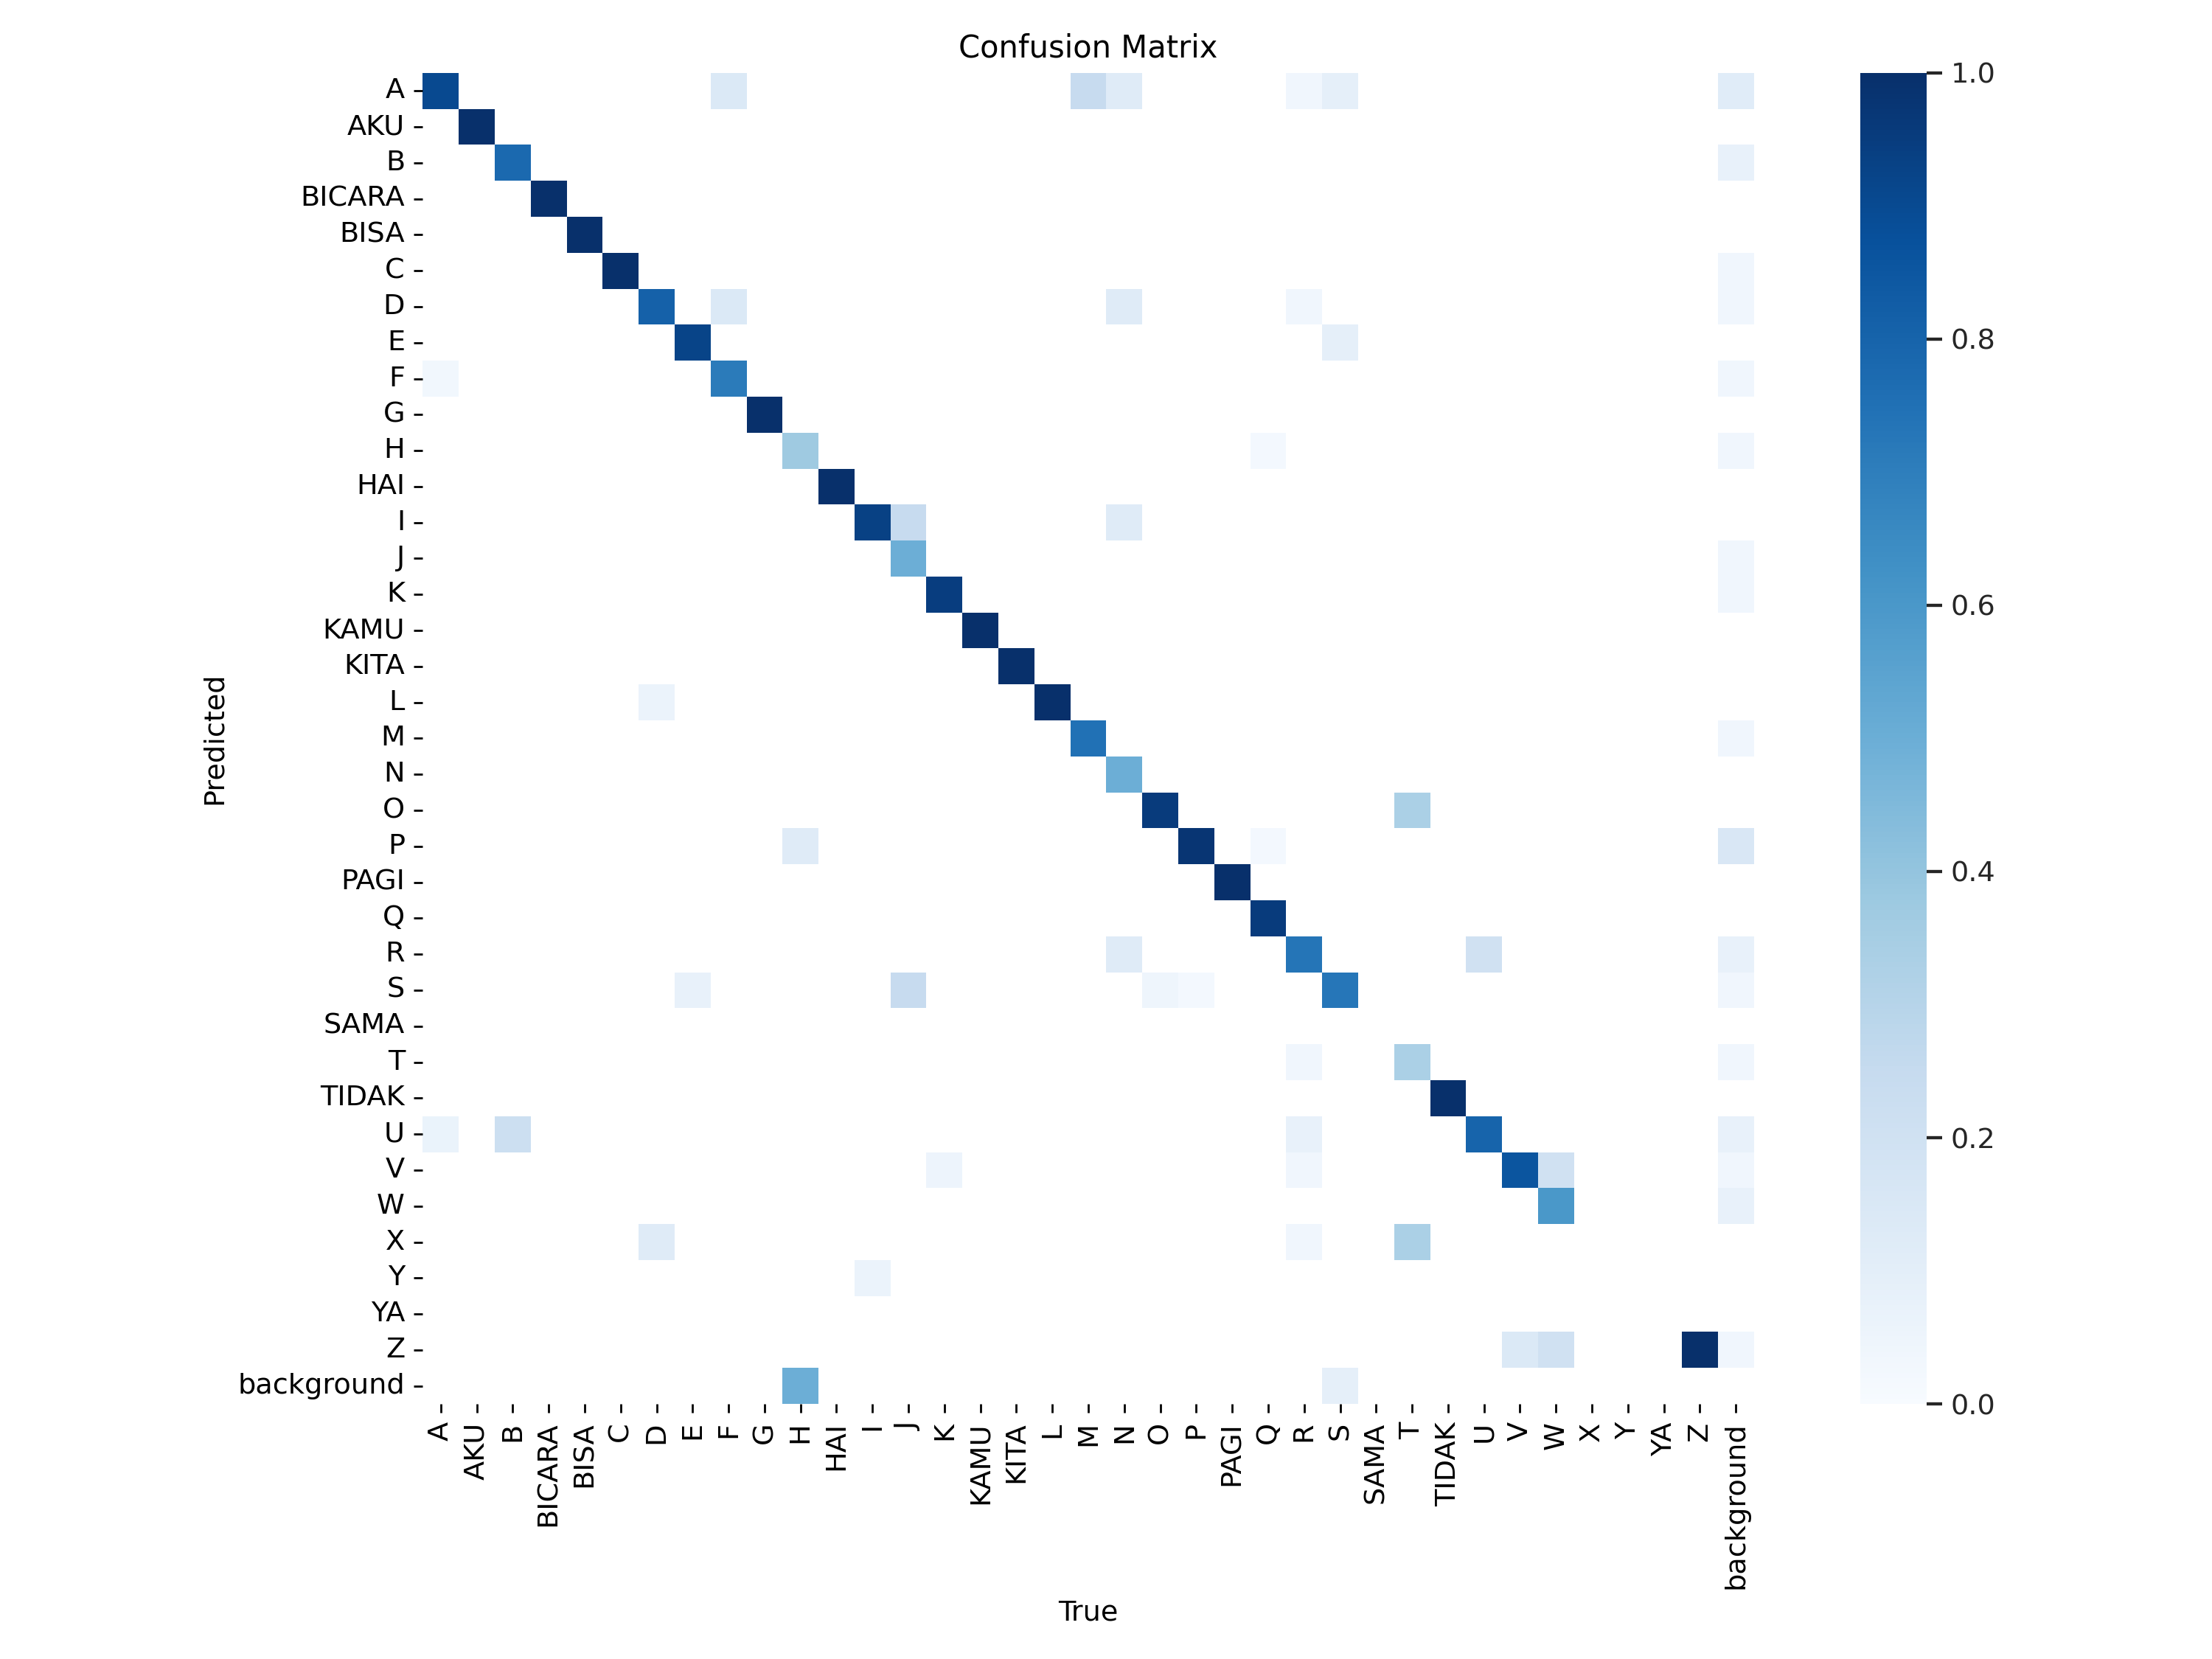

In [25]:
from utils.plots import plot_results
Image(filename='runs/train/yolov5s_results/confusion_matrix.png', width=1000)

In [18]:
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.1 --source /content/T.png

detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=/content/T.png, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7107217 parameters, 0 gradients, 16.1 GFLOPs
Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/y

In [19]:
#download
from google.colab import files
files.download('/content/yolov5/runs/train/yolov5s_results/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
#download
from google.colab import files
files.download('runs/train/yolov5s_results/confusion_matrix.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>